# Implementing a multiple hidden layer Neural Network 


![deep_network_model](../images/deep_network_model_avatar.jpg)


The progress of the model can be saved during and after training. This means that a model can be resumed where it left off and avoid long training times. Saving also means that you can share your model and others can recreate your work.

In the last post, we presented a simple regression problem that we solved with a neural network with a single hidden layer.
I made a prediction of one of the variables involved.

This type of prediction is called "problems or regression analysis", compared to other types of problems such as "classification"
(see Artifical Intelligence Taxonomy in my post, https://todotrader.com/artificial-intelligence-trading-systems /)

Regression analysis can help us to model the relationship between a dependent variable (which we are trying to predict) and one or more independent variables (the input of the model). The regression analysis can show if there is a significant relationship between the independent variables and the dependent variable, and the importance of their interrelation: when the independent variables move, how much can we expect the dependent variable to move?


We will illustrate how to create a multiple fully connected hidden layer NN, save it and make predictions with trained model after reload it.

We will use a more complex data than the iris data is for this exercise. Tha dataset is "Concrete Compressive Strength Data Set" from:
https://archive.ics.uci.edu/ml/datasets/Concrete+Compressive+Strength

Data Characteristics:
    
The actual concrete compressive strength (MPa) for a given mixture under a 
specific age (days) was determined from laboratory. Data is in raw form (not scaled). 

Summary Statistics: 

Number of instances (observations): 1030
Number of Attributes: 9
Attribute breakdown: 8 quantitative input variables, and 1 quantitative output variable
Missing Attribute Values: None

We will build a three-hidden layer neural network  to predict the nineth attribute, the concrete compressive strength, from the other eight.

## Load configuration

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
#from sklearn.datasets import load_iris
from tensorflow.python.framework import ops
import pandas as pd

/home/parrondo/anaconda3/envs/deeptrading/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/parrondo/anaconda3/envs/deeptrading/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/parrondo/anaconda3/envs/deeptrading/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


## Ingest raw data

In [2]:
# Dataset "Concrete Compressive Strength Data Set" from: https://archive.ics.uci.edu/ml/datasets/Concrete+Compressive+Strength
df = pd.read_excel(r'../data/raw/Concrete_Data.xls') #for an earlier version of Excel, you may need to use the file extension of 'xls'

#Simplifying column names
df.columns = ["Cement", "Blast Furnace Slag", "Fly Ash", "Water", "Superplasticizer",
              "Coarse Aggregate", "Fine Aggregate", "Age", "Strength"]
# We get a pandas dataframe to better visualize the datasets
df

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90,47.029847
6,380.0,95.0,0.0,228.0,0.0,932.0,594.0,365,43.698299
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,28,36.447770
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.854291
9,475.0,0.0,0.0,228.0,0.0,932.0,594.0,28,39.289790


In [3]:
# Now our usual X, y variables
X_raw = df[df.columns[0:8]].values
y_raw = df[df.columns[8]].values

# Dimensions of dataset
print("Dimensions of dataset")
n = X_raw.shape[0]
p = X_raw.shape[1]
print("n=",n,"p=",p)

Dimensions of dataset
n= 1030 p= 8


In [4]:
X_raw.shape # Array 1030x8. Each element is an 8-dimensional data point: Cement, Blast Furnace Slag, Fly Ash,...

(1030, 8)

In [5]:
y_raw.shape # Vector 1030. Each element is a 1-dimensional (scalar) data point: Strength

(1030,)

In [6]:
# We can confirm the data are right with a simple visualization.
X_raw

array([[ 540. ,    0. ,    0. , ..., 1040. ,  676. ,   28. ],
       [ 540. ,    0. ,    0. , ..., 1055. ,  676. ,   28. ],
       [ 332.5,  142.5,    0. , ...,  932. ,  594. ,  270. ],
       ...,
       [ 148.5,  139.4,  108.6, ...,  892.4,  780. ,   28. ],
       [ 159.1,  186.7,    0. , ...,  989.6,  788.9,   28. ],
       [ 260.9,  100.5,   78.3, ...,  864.5,  761.5,   28. ]])

In [7]:
y_raw

array([79.98611076, 61.88736576, 40.26953526, ..., 23.69660064,
       32.76803638, 32.40123514])

## Basic pre-process data

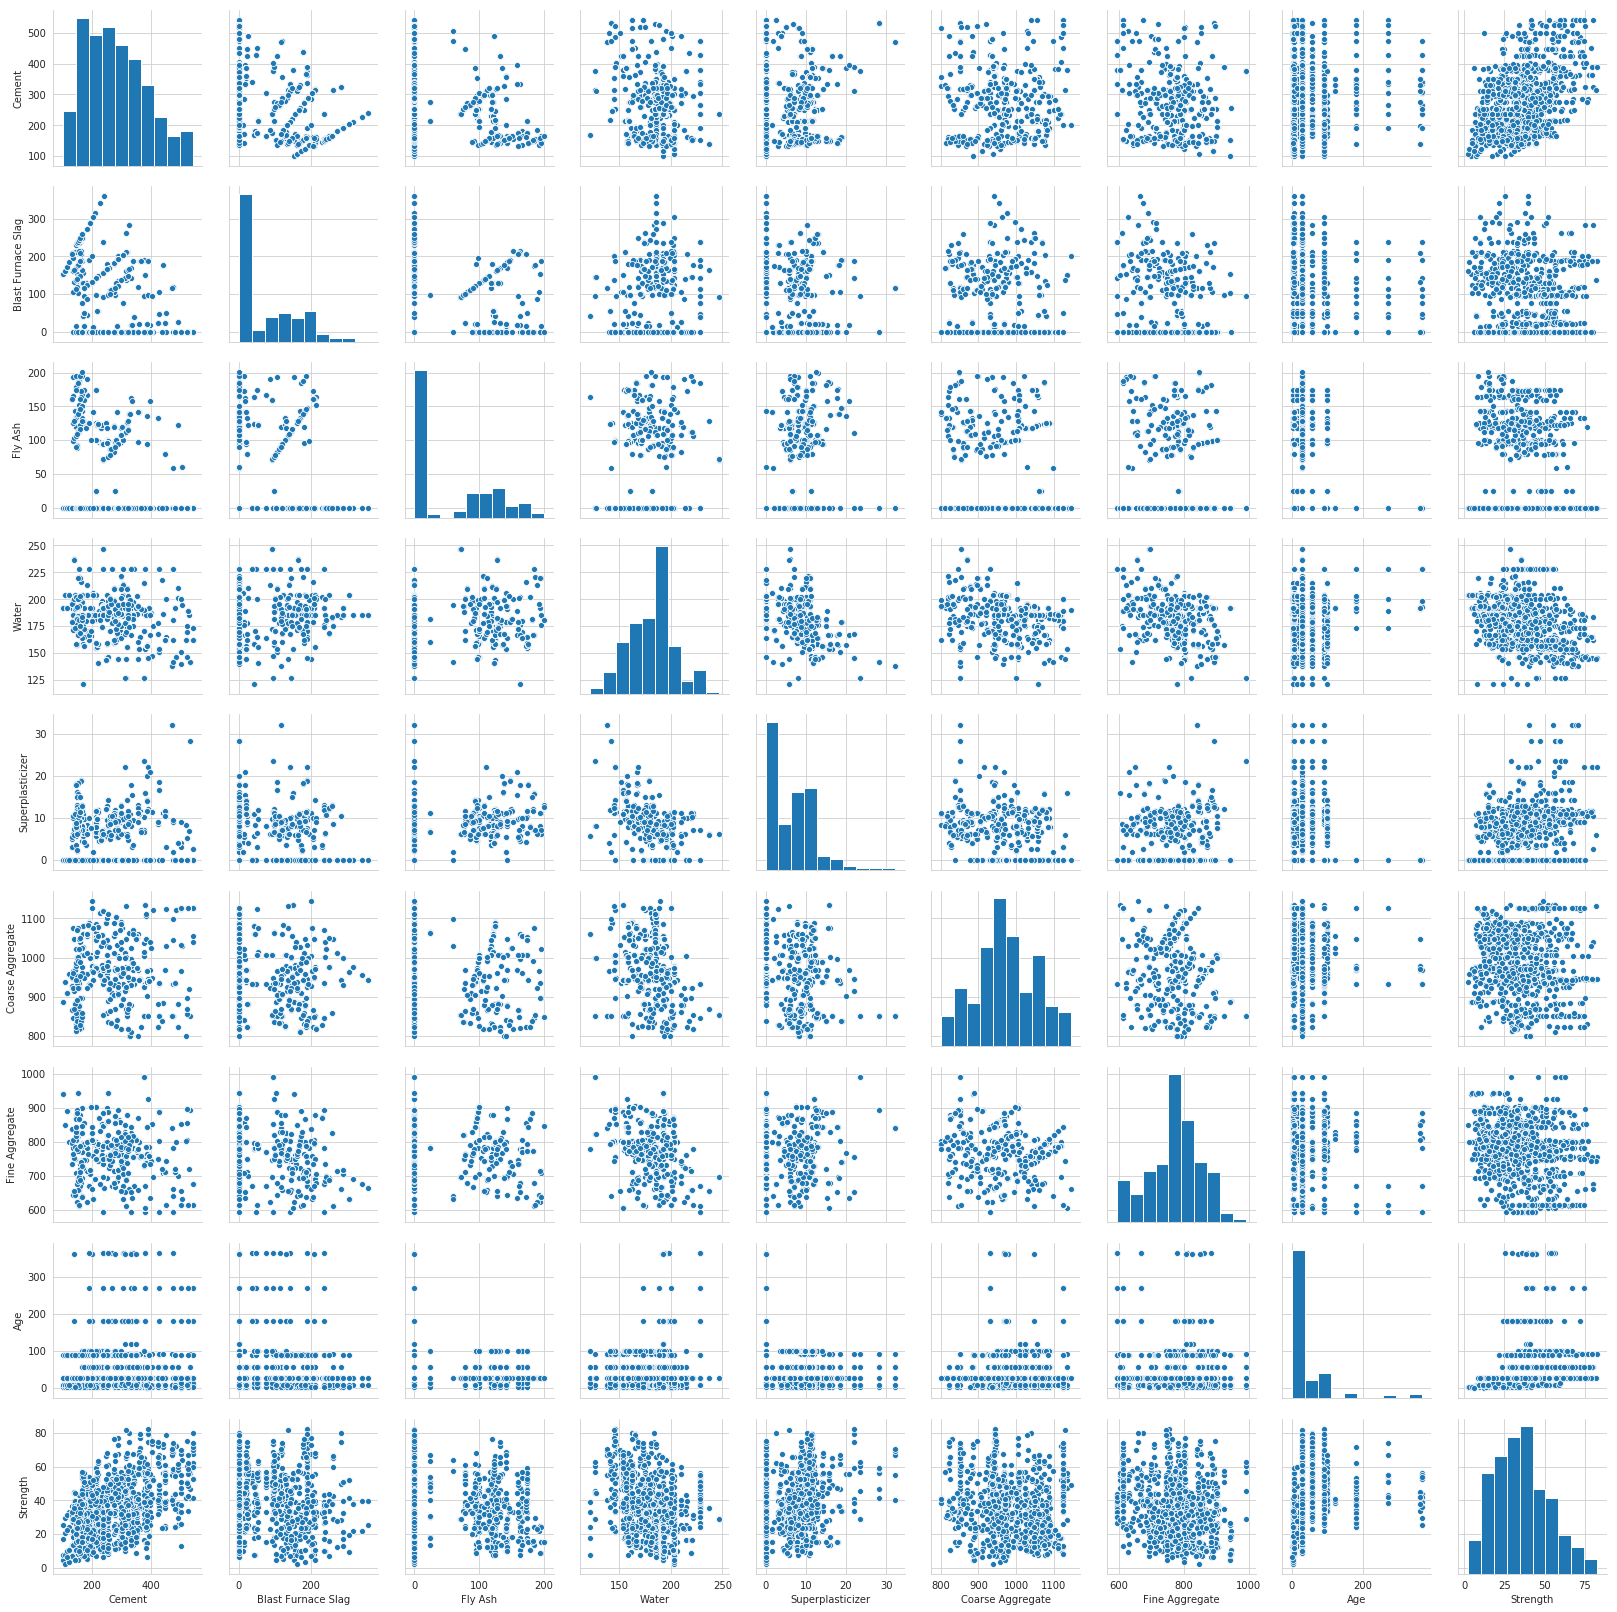

In [8]:
# Visualization
sns.set_style("whitegrid");
sns.pairplot(df);
plt.show()

As you can see it is a pretty difficult problem. There are almost no correlations between Strenght and the other features. Visually we can see some correlation of Strenght with the kind of Cement (it is not surprising, of course).

Now we are going to plot the diagonal correlation matrix:

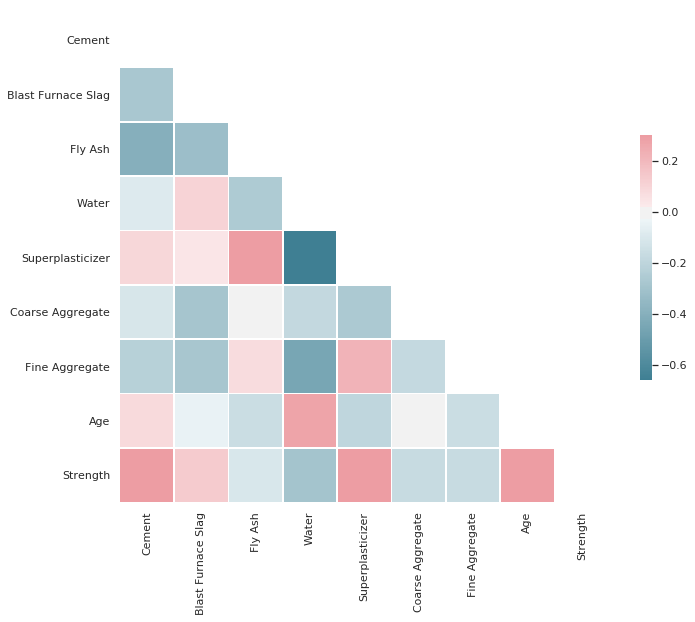

In [9]:
# Correlation
sns.set(style="white")

# Generate a large random dataset
rs = np.random.RandomState(33)

# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [10]:
#
# We could try to make some pre-processing of data in order to find or simplfy features,
# but it is a problem for another notebook. Now we mantain the focus on the basis.
#

## Split data

In [11]:
# split into train and test sets

# Total samples
nsamples = n

# Splitting into train (90%) and test (10%) sets
split = 90 # training split% ; test (100-split)%
jindex = nsamples*split//100 # Index for slicing the samples

# Samples in train
nsamples_train = jindex

# Samples in test
nsamples_test = nsamples - nsamples_train
print("Total number of samples: ",nsamples,"\nSamples in train set: ", nsamples_train,
      "\nSamples in test set: ",nsamples_test)

# Here are train and test samples
X_train = X_raw[:jindex, :]
y_train = y_raw[:jindex]

X_test = X_raw[jindex:, :]
y_test = y_raw[jindex:]

print("X_train.shape = ", X_train.shape, "y_train.shape =", y_train.shape, "\nX_test.shape =  ",
      X_test.shape, "y_test.shape = ", y_test.shape)


Total number of samples:  1030 
Samples in train set:  927 
Samples in test set:  103
X_train.shape =  (927, 8) y_train.shape = (927,) 
X_test.shape =   (103, 8) y_test.shape =  (103,)


## Transform features

**Note**

Be careful not to write `X_test_std = sc.fit_transform(X_test)` instead of `X_test_std = sc.transform(X_test)`. In this case, it wouldn't make a great difference since the mean and standard deviation of the test set should be (quite) similar to the training set. However, this is not always the case in Forex market data, as has been well stablished in literature. The correct way is to re-use parameters from the training set if we are doing any kind of transformation. So, the test set should basically stand for "new, unseen" data.


In [12]:
# Scale data
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

y_train_std = sc.fit_transform(y_train.reshape(-1, 1))
y_test_std = sc.transform(y_test.reshape(-1, 1))

/home/parrondo/anaconda3/envs/deeptrading/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/parrondo/anaconda3/envs/deeptrading/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [13]:
y_test

array([33.05347944, 24.5798194 , 21.91154728, 30.88163004, 15.340841  ,
       24.3385028 , 23.8903434 , 22.93197176, 29.41304616, 28.62980142,
       36.80491836, 18.28766142, 32.72046253, 31.4201108 , 28.9379972 ,
       40.92522693, 12.18097249, 25.5595648 , 36.44363293, 32.96384756,
       23.8358748 , 26.23318285, 17.95947085, 38.6306508 , 19.0095428 ,
       33.71882378,  8.53640236, 13.46132942, 32.24541357, 23.52423164,
       29.72606826, 49.77327244, 52.44637089, 40.9348796 , 44.86834018,
       13.20208645, 37.43165204, 29.87085822, 56.61907964, 12.4595208 ,
       23.786922  , 13.29378676, 39.42147978, 46.23419213, 44.52360218,
       23.74417449, 26.14768782, 15.52631004, 43.57833058, 35.86585204,
       41.05346947, 28.99108685, 46.24729218, 26.92265885, 10.53588276,
       25.10382116, 29.07313449,  9.73815902, 33.798803  , 37.17103011,
       33.76226077, 16.50398701, 19.98790924, 36.3498642 , 38.21558625,
       15.42357812, 33.4195912 , 39.0560575 , 27.68108245, 26.85

But we can revert the situation if we need.

In [14]:
sc.inverse_transform(y_test_std)

array([[33.05347944],
       [24.5798194 ],
       [21.91154728],
       [30.88163004],
       [15.340841  ],
       [24.3385028 ],
       [23.8903434 ],
       [22.93197176],
       [29.41304616],
       [28.62980142],
       [36.80491836],
       [18.28766142],
       [32.72046253],
       [31.4201108 ],
       [28.9379972 ],
       [40.92522693],
       [12.18097249],
       [25.5595648 ],
       [36.44363293],
       [32.96384756],
       [23.8358748 ],
       [26.23318285],
       [17.95947085],
       [38.6306508 ],
       [19.0095428 ],
       [33.71882378],
       [ 8.53640236],
       [13.46132942],
       [32.24541357],
       [23.52423164],
       [29.72606826],
       [49.77327244],
       [52.44637089],
       [40.9348796 ],
       [44.86834018],
       [13.20208645],
       [37.43165204],
       [29.87085822],
       [56.61907964],
       [12.4595208 ],
       [23.786922  ],
       [13.29378676],
       [39.42147978],
       [46.23419213],
       [44.52360218],
       [23

## Implement the model

In [15]:
# Clears the default graph stack and resets the global default graph
ops.reset_default_graph()


In [16]:
# make results reproducible
seed = 2
tf.set_random_seed(seed)
np.random.seed(seed)  


# Parameters
learning_rate = 0.005
batch_size = 50
n_features = X_train.shape[1]#  Number of features in training data
epochs = 10000
display_step = 100
model_path = "../model/tmp/model.ckpt"
n_classes = 1

# Network Parameters
# See figure of the model
d0 = D = n_features # Layer 0 (Input layer number of features)
d1 = 5 # Layer 1 (5 hidden nodes)
d2 = 15 # Layer 2 (15 hidden nodes) 
d3 = 5 # Layer 3 (3 hidden nodes)
d4 = C = 1 # Layer 4 (Output layer)

# tf Graph input
print("Placeholders")
X = tf.placeholder(dtype=tf.float32, shape=[None, n_features], name="X")
y = tf.placeholder(dtype=tf.float32, shape=[None,n_classes], name="y")


# Initializers
print("Initializers")
sigma = 1
weight_initializer = tf.variance_scaling_initializer(mode="fan_avg", distribution="uniform", scale=sigma)
bias_initializer = tf.zeros_initializer()

# Create model
def multilayer_perceptron(X, variables):
    # Hidden layer with ReLU activation
    layer_1 = tf.nn.relu(tf.add(tf.matmul(X, variables['W1']), variables['bias1']))
    # Hidden layer with ReLU activation
    layer_2 = tf.nn.relu(tf.add(tf.matmul(layer_1, variables['W2']), variables['bias2']))
    # Hidden layer with ReLU activation
    layer_3 = tf.nn.relu(tf.add(tf.matmul(layer_2, variables['W3']), variables['bias3']))
    # Output layer with ReLU activation
    out_layer = tf.nn.relu(tf.add(tf.matmul(layer_3, variables['W4']), variables['bias4']))
    return out_layer

# Store layers weight & bias
variables = {
    'W1': tf.Variable(weight_initializer([n_features, d1]), name="W1"), # inputs -> d1 hidden neurons
    'bias1': tf.Variable(bias_initializer([d1]), name="bias1"), # one biases for each d1 hidden neurons
    'W2': tf.Variable(weight_initializer([d1, d2]), name="W2"), # d1 hidden inputs -> d2 hidden neurons
    'bias2': tf.Variable(bias_initializer([d2]), name="bias2"), # one biases for each d2 hidden neurons
    'W3': tf.Variable(weight_initializer([d2, d3]), name="W3"), ## d2 hidden inputs -> d3 hidden neurons
    'bias3': tf.Variable(bias_initializer([d3]), name="bias3"), # one biases for each d3 hidden neurons
    'W4': tf.Variable(weight_initializer([d3, d4]), name="W4"), # d3 hidden inputs -> 1 output
    'bias4': tf.Variable(bias_initializer([d4]), name="bias4") # 1 bias for the output
}

# Construct model
y_hat = multilayer_perceptron(X, variables)

# Define loss and optimizer
loss = tf.reduce_mean(tf.square(y - y_hat)) # MSE
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss) # Train step

# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

# 'Saver' op to save and restore all the variables
saver = tf.train.Saver()



Placeholders
Initializers


## Train the model  and Evaluate the model

In [17]:
# Running first session
print("Starting 1st session...")
with tf.Session() as sess:

    # Writer to record image, scalar, histogram and graph for display in tensorboard
    writer = tf.summary.FileWriter("../model/tmp/tensorflow_logs", sess.graph)  # create writer
    writer.add_graph(sess.graph)

    # Run the initializer
    sess.run(init)

    # Training cycle
    train_loss = []
    test_loss = []
    
    for epoch in range(epochs):
        rand_index = np.random.choice(len(X_train_std), size=batch_size)
        X_rand = X_train_std[rand_index]
        y_rand = y_train_std[rand_index]
        #y_rand = np.transpose([y_train[rand_index]])
        sess.run(optimizer, feed_dict={X: X_rand, y: y_rand})

        train_temp_loss = sess.run(loss, feed_dict={X: X_rand, y: y_rand})
        train_loss.append(np.sqrt(train_temp_loss))
    
        test_temp_loss = sess.run(loss, feed_dict={X: X_test_std, y: y_test_std})
        #test_temp_loss = sess.run(loss, feed_dict={X: X_test_std, y: np.transpose([y_test])})
        test_loss.append(np.sqrt(test_temp_loss))
        if (epoch+1) % display_step == 0:
            print("Epoch:", '%04d' % (epoch+1), "Loss=", \
                "{:.9f}".format(train_temp_loss))

    # Close writer
    writer.flush()
    writer.close()
        
    # Save model weights to disk
    save_path = saver.save(sess, model_path)
    print("Model saved in file: %s" % save_path)
    print("First Optimization Finished!")


Starting 1st session...
Epoch: 0100 Loss= 1.187452793
Epoch: 0200 Loss= 0.653784931
Epoch: 0300 Loss= 0.850386798
Epoch: 0400 Loss= 0.666906953
Epoch: 0500 Loss= 0.922570705
Epoch: 0600 Loss= 0.788938463
Epoch: 0700 Loss= 0.720452368
Epoch: 0800 Loss= 0.650036752
Epoch: 0900 Loss= 0.696900964
Epoch: 1000 Loss= 0.559514642
Epoch: 1100 Loss= 0.576028287
Epoch: 1200 Loss= 0.649010479
Epoch: 1300 Loss= 0.679859638
Epoch: 1400 Loss= 0.513536632
Epoch: 1500 Loss= 0.522186100
Epoch: 1600 Loss= 0.464669585
Epoch: 1700 Loss= 0.482417375
Epoch: 1800 Loss= 0.514982164
Epoch: 1900 Loss= 0.873984993
Epoch: 2000 Loss= 0.710068643
Epoch: 2100 Loss= 0.583979726
Epoch: 2200 Loss= 0.510860145
Epoch: 2300 Loss= 0.409339219
Epoch: 2400 Loss= 0.689149320
Epoch: 2500 Loss= 0.465828985
Epoch: 2600 Loss= 0.475971222
Epoch: 2700 Loss= 0.609764397
Epoch: 2800 Loss= 0.535831273
Epoch: 2900 Loss= 0.499730915
Epoch: 3000 Loss= 0.495828092
Epoch: 3100 Loss= 0.536907375
Epoch: 3200 Loss= 0.523644745
Epoch: 3300 Loss

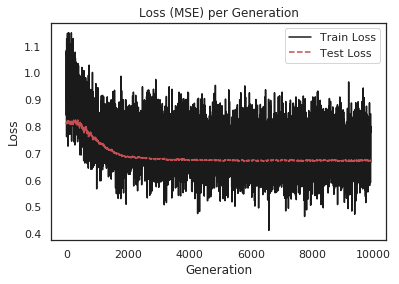

In [18]:
%matplotlib inline
# Plot loss (MSE) over time
plt.plot(train_loss[100:], 'k-', label='Train Loss')
plt.plot(test_loss[100:], 'r--', label='Test Loss')
plt.title('Loss (MSE) per Generation')
plt.legend(loc='upper right')
plt.xlabel('Generation')
plt.ylabel('Loss')
plt.show()

We can see the error of this model is big. So, it is not a very accurate model.

### Tensorboard Graph


What follows is the graph we have executed and all data about it. Note the "save" label and the several layers.


![graph_4](../images/graph_4.png)


### Saving a Tensorflow model

So, now we have our model saved.

Tensorflow model has four main files:
* a) Meta graph:
This is a protocol buffer which saves the complete Tensorflow graph; i.e. all variables, operations, collections etc. This file has .meta extension.


* b) y c) Checkpoint files:
It is a binary file which contains all the values of the weights, biases, gradients and all the other variables saved. Tensorflow has changed from version 0.11. Instead of a single .ckpt file, we have now two files: .index and .data file that contains our training variables. 


* d) Along with this, Tensorflow also has a file named checkpoint which simply keeps a record of latest checkpoint files saved.



### Retrain the model


We can retrain the model as many times as we want to.

In [19]:
# Running a new session
print("Starting 2nd session...")
with tf.Session() as sess:
    # Initialize variables
    sess.run(init)

    # Restore model weights from previously saved model
    saver.restore(sess, model_path)
    print("Model restored from file: %s" % model_path)

    # Resume training
    for epoch in range(epochs):
        rand_index = np.random.choice(len(X_train), size=batch_size)
        X_rand = X_train_std[rand_index]
        y_rand = y_train_std[rand_index]
        #y_rand = np.transpose([y_train[rand_index]])
        sess.run(optimizer, feed_dict={X: X_rand, y: y_rand})

        train_temp_loss = sess.run(loss, feed_dict={X: X_rand, y: y_rand})
        train_loss.append(np.sqrt(train_temp_loss))
    
        test_temp_loss = sess.run(loss, feed_dict={X: X_test_std, y: y_test_std})
        # test_temp_loss = sess.run(loss, feed_dict={X: X_test_std, y: np.transpose([y_test])})
        test_loss.append(np.sqrt(test_temp_loss))
        if (epoch+1) % display_step == 0:
            print("Epoch:", '%04d' % (epoch+1), "Loss=", \
                "{:.9f}".format(train_temp_loss))

    # Close writer
    writer.flush()
    writer.close()
    
    # Save model weights to disk
    save_path = saver.save(sess, model_path)
    print("Model saved in file: %s" % save_path)
    print("Second Optimization Finished!")


Starting 2nd session...
INFO:tensorflow:Restoring parameters from ../model/tmp/model.ckpt
Model restored from file: ../model/tmp/model.ckpt
Epoch: 0100 Loss= 0.553170979
Epoch: 0200 Loss= 0.394454986
Epoch: 0300 Loss= 0.430046231
Epoch: 0400 Loss= 0.474143565
Epoch: 0500 Loss= 0.581448019
Epoch: 0600 Loss= 0.509629428
Epoch: 0700 Loss= 0.395796895
Epoch: 0800 Loss= 0.555636227
Epoch: 0900 Loss= 0.343794316
Epoch: 1000 Loss= 0.837739229
Epoch: 1100 Loss= 0.313927382
Epoch: 1200 Loss= 0.527575970
Epoch: 1300 Loss= 0.503197849
Epoch: 1400 Loss= 0.409355879
Epoch: 1500 Loss= 0.603905439
Epoch: 1600 Loss= 0.409259796
Epoch: 1700 Loss= 0.363913029
Epoch: 1800 Loss= 0.405373842
Epoch: 1900 Loss= 0.355158567
Epoch: 2000 Loss= 0.567333281
Epoch: 2100 Loss= 0.626644850
Epoch: 2200 Loss= 0.366723627
Epoch: 2300 Loss= 0.392675012
Epoch: 2400 Loss= 0.459658206
Epoch: 2500 Loss= 0.624418736
Epoch: 2600 Loss= 0.503614545
Epoch: 2700 Loss= 0.536920547
Epoch: 2800 Loss= 0.298828572
Epoch: 2900 Loss= 0.

## Predict

Finally, we can use the model to make some predictions.
First we transform our samples accordingly.

In [20]:
sc.transform([[203.5, 305.3, 0.0, 203.5, 0.0, 963.4, 630.0, 90],
              [173.0, 116.0, 0.0, 192.0, 0.0, 946.8, 856.8, 90],
              [522.0, 0.0, 0.0, 146.0, 0.0, 896.0, 896.0, 7]]) #True value  51.86, 32.10, 50.51

array([[ 9.78564946, 15.74026644, -2.11773518,  9.78564946, -2.11773518,
        54.23470101, 34.73303791,  3.14666097],
       [ 8.00160409,  4.66748653, -2.11773518,  9.11297662, -2.11773518,
        53.26371238, 47.99931622,  3.14666097],
       [28.41576252, -2.11773518, -2.11773518,  6.42228525, -2.11773518,
        50.29225322, 50.29225322, -1.70828215]])

Then, we make the predictions:

In [21]:
# Running a new session for predictions
print("Starting prediction session...")
with tf.Session() as sess:
    # Initialize variables
    sess.run(init)

    # Restore model weights from previously saved model
    saver.restore(sess, model_path)
    print("Model restored from file: %s" % model_path)

    # We try to predict the Concrete compressive strength (MPa megapascals) of three samples
    feed_dict_std = {X: [[ 9.78564946, 15.74026644, -2.11773518,  9.78564946, -2.11773518,
        54.23470101, 34.73303791,  3.14666097],
       [ 8.00160409,  4.66748653, -2.11773518,  9.11297662, -2.11773518,
        53.26371238, 47.99931622,  3.14666097],
       [28.41576252, -2.11773518, -2.11773518,  6.42228525, -2.11773518,
        50.29225322, 50.29225322, -1.70828215]]}
    prediction = sess.run(y_hat, feed_dict_std)
    print(prediction) #True value  51.86, 32.10, 50.51


Starting prediction session...
INFO:tensorflow:Restoring parameters from ../model/tmp/model.ckpt
Model restored from file: ../model/tmp/model.ckpt
[[0.137997 ]
 [0.137997 ]
 [1.1572909]]


In [22]:
y_hat_rev = sc.inverse_transform(prediction)
y_hat_rev

array([[38.563946],
       [38.563946],
       [55.989773]], dtype=float32)

OK, better results, but still not very good results. We could try to improve them with a deeper network (more layers) or retouching the net parameters and number of neurons. That is another story.

Not really good but illustrative of using deep neural network for this kind of difficult problems.